# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)







\begin{equation}
A = As - 2\frac{(r\cos\theta/2 )(r\sin\theta/2)}{2} 
\end{equation}


.

.

.




\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [1]:
f = lambda theta: theta-np.sin(theta)-np.pi/2

In [7]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)


1000

In [11]:
df = pd.DataFrame()

df["theta"] = theta
df["F_theta"] = f(theta)

No handles with labels found to put in legend.


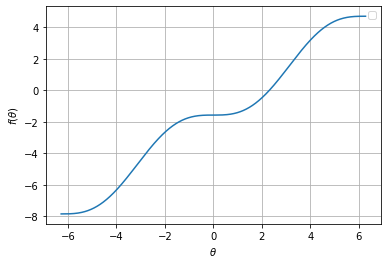

In [17]:
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

In [24]:
root = optimize.bisect(f, 0, 4)
print(f"EL ángulo es: {root:.5} ")

EL ángulo es: 2.3099 


In [26]:
np.rad2deg(root)

132.3464588341314




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [27]:

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [28]:

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3
  


In [29]:
#Grafica de las ecuaciones


In [40]:
t = np.linspace(0, 20, 100) #Tiempo 
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
pos = { "X": x , "Y": y, "Tiempo": t }
df = pd.DataFrame.from_dict(pos)


In [50]:
plt.subplot?

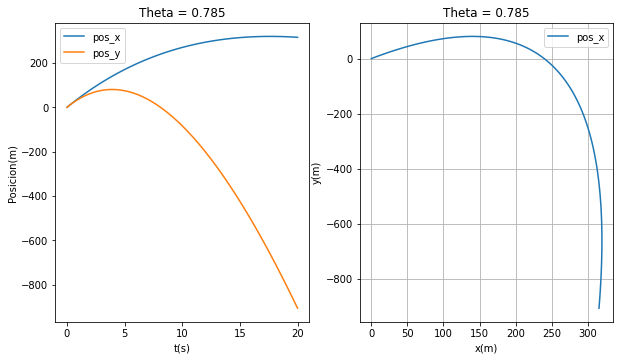

In [55]:
plt.figure(figsize=(10,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("t(s)")
plt.ylabel("Posicion(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
#plt.show()


plt.subplot(122)

plt.plot(df["X"], df["Y"], label="pos_x") 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

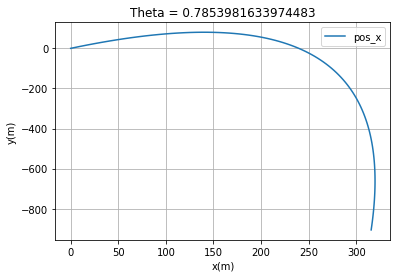